Using available economic, financial, and other data of your choosing, develop a forecast of the direction and (perhaps) the magnitude of credit spread movements using machine learning based tools and techniques

In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api as sts
import scipy.stats as stats

import sklearn
from dateutil import parser
from datetime import datetime
from sklearn.tree import DecisionTreeRegressor
from statistics import mean
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Monthly Data

In [2]:
df = pd.read_csv('C:/Users/think/Downloads/monthly_df_interpolate.csv')
df.set_index('DATE',inplace=True)
df.dropna(how='any',inplace=True)
#normalize(df, norm='l2', axis=0, copy=True, return_norm=False)

#for i in df.columns:
#    df[i]=normalize(df[i], norm='l2', axis=0, copy=True, return_norm=False)

In [3]:
df['AAA_Difference']=df['AAA'].diff()
df['BAA_Difference']=df['BAA'].diff()
df['GS10_Difference']=df['GS10'].diff()
df['BAA_GS10']=df['BAA']-df['GS10']
df['BAA_GS10_Difference']=(df['BAA']-df['GS10']).diff()
df.dropna(how='any',inplace=True)

In [4]:
df

,AAA,BAA,GS10,INDPRO,IPG211111CN,IPG2211A2N,IPMAN,MCOILWTICO,OILMR_Return,GOLD_Return,...,GS7_Difference,VIXCLS_Difference,VXOCLS_Difference,UNRATE_Difference,AAA_GS10_Difference,AAA_Difference,BAA_Difference,GS10_Difference,BAA_GS10,BAA_GS10_Difference
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-31,9.37,10.21,8.59,64.3607,114.2944,73.4205,60.3077,20.39,-0.080985,-0.056497,...,0.17,-3.200359,-4.495478,-0.1,0.78,0.15,0.07,0.12,1.62,-5.000000e-02
1990-04-30,9.46,10.30,8.79,64.2562,113.8919,67.4636,60.1199,18.43,-0.101065,-0.048755,...,0.16,1.341227,1.626136,0.2,0.67,0.09,0.09,0.20,1.51,-1.100000e-01
1990-05-31,9.47,10.41,8.76,64.3971,112.6808,66.0145,60.2522,18.20,-0.012558,-0.016334,...,-0.03,-3.305773,-2.305682,0.0,0.71,0.01,0.11,-0.03,1.65,1.400000e-01
1990-06-30,9.26,10.22,8.48,64.6064,109.2573,71.6535,60.4470,16.70,-0.086013,-0.044907,...,-0.26,-1.275346,-0.568961,-0.2,0.78,-0.21,-0.19,-0.28,1.74,9.000000e-02
1990-07-31,9.24,10.20,8.47,64.5289,110.2963,76.8376,60.3354,18.45,0.099656,0.025652,...,-0.06,1.570476,1.350000,0.3,0.77,-0.02,-0.02,-0.01,1.73,-1.000000e-02
1990-08-31,9.41,10.41,8.75,64.7258,112.0397,77.3265,60.5188,27.31,0.392189,0.087387,...,0.18,9.782360,8.842360,0.2,0.66,0.17,0.21,0.28,1.66,-7.000000e-02
1990-09-30,9.56,10.64,8.89,64.8148,111.0747,73.2770,60.5266,33.51,0.204591,-0.013517,...,0.15,0.932151,1.043730,0.2,0.67,0.15,0.23,0.14,1.75,9.000000e-02
1990-10-31,9.53,10.74,8.72,64.3264,115.9683,67.6237,60.0246,36.04,0.072786,-0.021346,...,-0.20,0.518284,1.311487,0.0,0.81,-0.03,0.10,-0.17,2.02,2.700000e-01
1990-11-30,9.30,10.62,8.39,63.5713,113.5778,68.7675,59.3549,32.33,-0.108634,0.001398,...,-0.31,-4.739938,-5.023768,0.3,0.91,-0.23,-0.12,-0.33,2.23,2.100000e-01


In [5]:
# Only the diff of 'T10Y2Y', 'DGS10','RU3000TRReturn', 'UNRATE' are stationary, but we don't need stationary for OLS and feature selection
'''
for i in ['T10Y2Y','DGS10','RU3000TRReturn','UNRATE']:
    df['diff'+i]=pd.DataFrame(df[i].diff(periods=1))
print (df.columns)
df.dropna(how='any',inplace=True)
'''

"\nfor i in ['T10Y2Y','DGS10','RU3000TRReturn','UNRATE']:\n    df['diff'+i]=pd.DataFrame(df[i].diff(periods=1))\nprint (df.columns)\ndf.dropna(how='any',inplace=True)\n"

In [6]:
# Test for stationary with ADF test
adfResult=[]
for c in df.columns:
    adfTest = adfuller(df[c], autolag=None,maxlag=0)
    adfResult.append(pd.Series(adfTest[0:4]))
adfResults=pd.concat(adfResult,axis=1,sort=False)
adfResults.columns=df.columns
adfResults.index= ['ADF Test Statistic', 'P-Value', '# Lags Used', '# Observations Used']
adfResults=adfResults.T
#print (adfResults[ ["P-Value","# Lags Used"]])

okres=[]
for i in adfResults.index:
    if adfResults["P-Value"][i]<=0.1:
        okres.append(pd.Series(adfResults.loc[i]))
    #elif adfResults["P-Value"][i]>0.05:
        #dfnew["log"+i]=np.log(dfnew[i])
okres=pd.concat(okres,axis=1,sort=False)
adfResults

,ADF Test Statistic,P-Value,# Lags Used,# Observations Used
AAA,-1.695570,4.333963e-01,0.0,347.0
BAA,-1.791866,3.845076e-01,0.0,347.0
GS10,-1.918122,3.235843e-01,0.0,347.0
INDPRO,-1.543724,5.117815e-01,0.0,347.0
IPG211111CN,2.326448,9.989714e-01,0.0,347.0
IPG2211A2N,-6.363127,2.446577e-08,0.0,347.0
IPMAN,-1.981806,2.946071e-01,0.0,347.0
MCOILWTICO,-1.579275,4.939954e-01,0.0,347.0
OILMR_Return,-13.685724,1.373616e-25,0.0,347.0
GOLD_Return,-16.320537,3.130865e-29,0.0,347.0


In [7]:
okres.to_csv('C:/Users/think/Downloads/monthly_stationary.csv')

In [8]:
dfnew=df[okres.columns]

In [9]:
dfnew.to_csv('C:/Users/think/Downloads/monthly_stationary.csv')

In [10]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
fig=sns.pairplot(dfnew,x_vars=[['UNRATE_Difference'],['CPIAUCSL_Return']],y_vars=['BAA_GS10_Difference'],kind="reg",markers="+")
fig.savefig('C:/Users/think/Downloads/Pairplot of X and Y_Bad_Looking.png')
fig

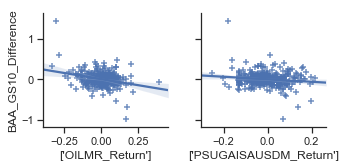

In [11]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
fig=sns.pairplot(dfnew,x_vars=[['OILMR_Return'],['PSUGAISAUSDM_Return']],y_vars=['BAA_GS10_Difference'],kind="reg",markers="+")
fig.savefig('C:/Users/think/Downloads/Pairplot of X and Y_Good_Looking.png')
fig

In [12]:
listToDrop=['BAA_Difference','IPG2211A2N','CPIAUCSL_Return','CPILFENS_Return','CPIMEDSL_Return','TOTALSL_Return','UNRATE_Difference']
cols = [col for col in dfnew.columns if col not in listToDrop]
dfnew2 = dfnew[cols]

In [13]:
dfnew2.to_csv('C:/Users/think/Downloads/monthly_stationary2.csv')

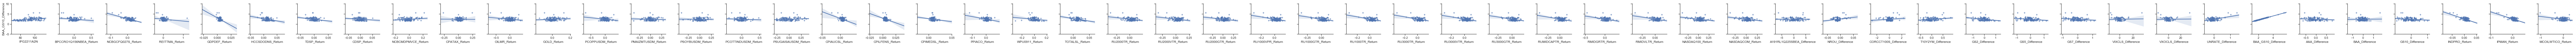

In [45]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(dfnew2,x_vars=dfnew2.columns,y_vars=['BAA_GS10_Difference'],kind="reg",markers="+")

C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Optimal regularization parameter : 1.5973122800602556e-05 for l1 ratio is 0.1


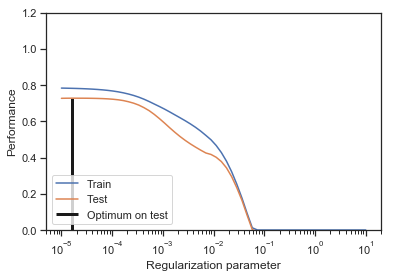

C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Optimal regularization parameter : 1.5973122800602556e-05 for l1 ratio is 0.5


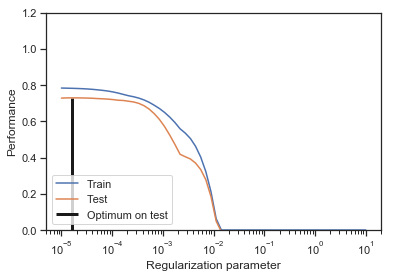

C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

Optimal regularization parameter : 2.0187602546790388e-05 for l1 ratio is 0.7


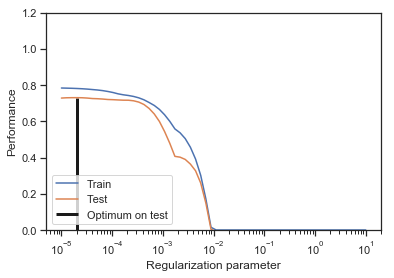

C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Optimal regularization parameter : 2.0187602546790388e-05 for l1 ratio is 0.9


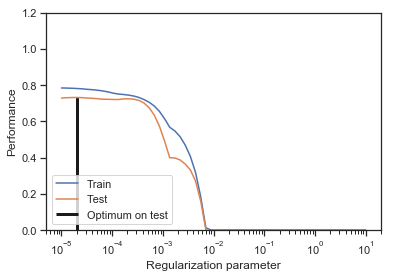

C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Optimal regularization parameter : 2.0187602546790388e-05 for l1 ratio is 0.95


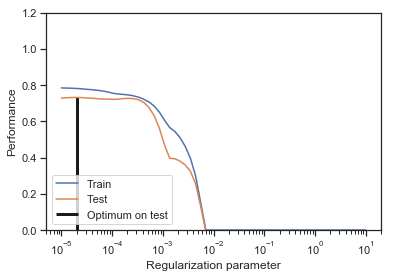

C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

Optimal regularization parameter : 2.0187602546790388e-05 for l1 ratio is 0.99


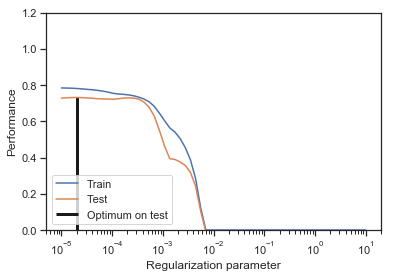

C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

Optimal regularization parameter : 2.0187602546790388e-05 for l1 ratio is 1


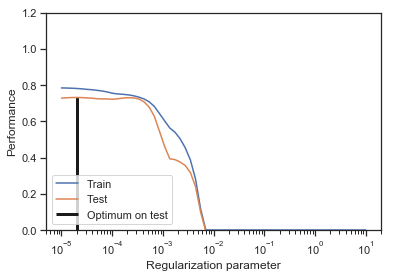

In [14]:
# Feature Selection with Elastic Net, train lambda first
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

listToDrop=['BAA_GS10_Difference']
Response=dfnew2['BAA_GS10_Difference']
NumAll=len(dfnew2.index)
p=0.8

n_samples_train, n_features = int(NumAll*p), len(dfnew2.columns)
n_samples_test=NumAll-n_samples_train

X = dfnew2.drop(listToDrop,axis=1)
y = Response

# Split train and test data
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
 
###############################################################################
# Compute train and test errors

l1_Ratios=[.1, .5, .7, .9, .95, .99, 1] #1 is LASSO
for l1R in l1_Ratios:
    alphas = np.logspace(-5, 1, 60)
    enet = linear_model.ElasticNet(l1_ratio=l1R, fit_intercept=True, normalize=True, precompute=False, max_iter=1000, copy_X=True)
    train_errors = list()
    test_errors = list()
    for alpha in alphas:
        enet.set_params(alpha=alpha)
        enet.fit(X_train, y_train)
        train_errors.append(enet.score(X_train, y_train))
        test_errors.append(enet.score(X_test, y_test))

    i_alpha_optim = np.argmax(test_errors)
    alpha_optim = alphas[i_alpha_optim]
    print("Optimal regularization parameter : %s for l1 ratio is %s" % (alpha_optim,l1R))
    
###############################################################################
# Plot results functions
    plt.semilogx(alphas, train_errors, label='Train')
    plt.semilogx(alphas, test_errors, label='Test')
    plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',linewidth=3, label='Optimum on test')
    plt.legend(loc='lower left')
    plt.ylim([0, 1.2])
    plt.xlabel('Regularization parameter')
    plt.ylabel('Performance')
    plt.show()

In [15]:
 # Estimate the coef_ on full data with optimal regularization parameter
optimL1ratio= 0.7
optimAlpha=  2.0187602546790388e-05
enet = linear_model.ElasticNet(l1_ratio=optimL1ratio, fit_intercept=True, normalize=True, precompute=False, max_iter=1000, copy_X=True)
enet.set_params(alpha=optimAlpha)
enetRes=enet.fit(X, y)
coef= pd.Series(enetRes.coef_, index = X.columns)
coefFinal=coef[coef!=0]
coefFinal

OILMR_Return          -0.064110
PCOPPUSDM_Return      -0.340542
PSOYBUSDM_Return       0.091073
PCOTTINDUSDM_Return   -0.023160
PSUGAISAUSDM_Return   -0.152340
PPIACO_Return         -1.914882
WPU0911_Return         0.193763
RU2000VTR_Return       0.719010
RU2000GTR_Return       0.248529
RU1000VPR_Return       1.085843
RU1000TR_Return       -1.407746
RU3000TR_Return       -0.946958
RU3000VTR_Return       1.678075
RUMIDCAPTR_Return     -1.253693
RMIDGRTR_Return        0.526218
RMIDVLTR_Return       -1.567084
NASDAQ100_Return       0.839924
NASDAQCOM_Return      -0.810591
T10Y2YM_Difference    -0.165744
GS2_Difference        -0.043896
GS5_Difference        -0.298856
VIXCLS_Difference     -0.003916
VXOCLS_Difference      0.005034
AAA_Difference         0.868052
GS10_Difference       -0.555685
dtype: float64

In [16]:
dfnew3_ENet = dfnew[list(coefFinal.index)]
dfnew3_ENet.to_csv('C:/Users/think/Downloads/monthly_stationary3_ENet.csv')

In [17]:
# Feature Selection with LASSO, we want the features with coef not zero
optimAlpha=2.0187602546790388e-05
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005, optimAlpha]).fit(X, y)
LAScoef = pd.Series(model_lasso.coef_, index = X.columns)
LAScoef=LAScoef[LAScoef!=0]
LAScoef

C:\Users\think\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


OILMR_Return          -0.179838
PCOPPUSDM_Return      -0.343926
PSUGAISAUSDM_Return   -0.052171
RUMIDCAPTR_Return     -0.111703
T10Y2YM_Difference    -0.032636
GS5_Difference        -0.223092
VIXCLS_Difference     -0.009558
VXOCLS_Difference      0.017253
AAA_Difference         0.781327
GS10_Difference       -0.623206
dtype: float64

In [18]:
dfnew3_Lasso = dfnew[list(LAScoef.index)]
dfnew3_Lasso.to_csv('C:/Users/think/Downloads/monthly_stationary3_Lasso.csv')

In [19]:
dfnew3_Lasso

,OILMR_Return,PCOPPUSDM_Return,PSUGAISAUSDM_Return,RUMIDCAPTR_Return,T10Y2YM_Difference,GS5_Difference,VIXCLS_Difference,VXOCLS_Difference,AAA_Difference,GS10_Difference
DATE,,,,,,,,,,
1990-03-31,-0.080985,0.107135,0.044066,0.024046,-0.14,0.18,-3.200359,-4.495478,0.15,0.12
1990-04-30,-0.101065,0.022417,-0.004583,-0.043887,0.11,0.17,1.341227,1.626136,0.09,0.20
1990-05-31,-0.012558,0.020318,-0.041533,0.086700,0.05,-0.03,-3.305773,-2.305682,0.01,-0.03
1990-06-30,-0.086013,-0.058816,-0.119751,-0.006499,0.01,-0.31,-1.275346,-0.568961,-0.21,-0.28
1990-07-31,0.099656,0.069220,-0.077732,-0.030188,0.18,-0.10,1.570476,1.350000,-0.02,-0.01
1990-08-31,0.392189,0.065483,-0.093395,-0.113805,0.38,0.11,9.782360,8.842360,0.17,0.28
1990-09-30,0.204591,0.027943,0.008201,-0.077012,0.12,0.07,0.932151,1.043730,0.15,0.14
1990-10-31,0.072786,-0.103027,-0.160067,-0.032071,0.03,-0.18,0.518284,1.311487,-0.03,-0.17
1990-11-30,-0.108634,-0.059620,0.068922,0.091942,-0.05,-0.31,-4.739938,-5.023768,-0.23,-0.33


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
acf(df[''],nlags = 100)
plot_acf(df['AAA10Y'],lags = 100)

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
pacf(df['AAA10Y'],nlags = 10)
plot_pacf(df['AAA10Y'],lags = 10)

In [6]:
df2 = pd.read_csv('C:/Users/think/Downloads/quarterly_df_interpolate.csv')
df2.set_index('DATE',inplace=True)
df2.dropna(how='any',inplace=True)
df2['AAA_Difference']=df2['AAA'].diff()
df2['BAA_Difference']=df2['BAA'].diff()
df2['GS10_Difference']=df2['GS10'].diff()
for i in ['INDPRO','IPG211111CN','IPG2211A2N','IPMAN','MCOILWTICO','NCBDBIQ027S']:
    df2[i+'_Return']=df2[i].diff()/df2[i]
df2.drop(['INDPRO','IPG211111CN','IPG2211A2N','IPMAN','MCOILWTICO','NCBDBIQ027S'],axis=1)
df2.dropna(how='any',inplace=True)

In [7]:
# Test for stationary with ADF test
adfResult=[]
for c in df2.columns:
    adfTest = adfuller(df2[c], autolag='AIC')
    adfResult.append(pd.Series(adfTest[0:4]))
adfResults=pd.concat(adfResult,axis=1,sort=False)
adfResults.columns=df2.columns
adfResults.index= ['ADF Test Statistic', 'P-Value', '# Lags Used', '# Observations Used']
adfResults=adfResults.T
#print (adfResults[ ["P-Value","# Lags Used"]])

okres=[]
for i in adfResults.index:
    if adfResults["P-Value"][i]<=0.05:
        okres.append(pd.Series(adfResults.loc[i]))
okres=pd.concat(okres,axis=1,sort=False)
okres.to_csv('C:/Users/think/Downloads/quarterly_stationary_adf.csv')

In [20]:
dfnew2=df2[okres.columns]
dfnew2.to_csv('C:/Users/think/Downloads/quarterly_stationary.csv')

Optimal regularization parameter : 0.022695105366946706 for l1 ratio is 0.1


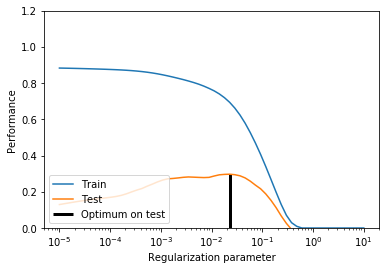

Optimal regularization parameter : 0.02868316813342012 for l1 ratio is 0.5


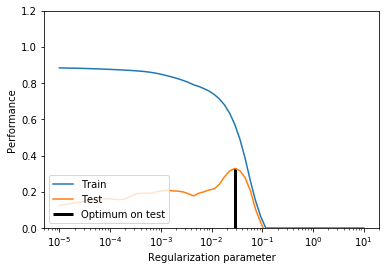

Optimal regularization parameter : 0.02868316813342012 for l1 ratio is 0.7


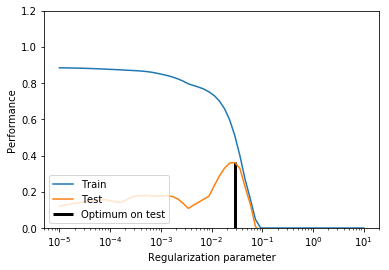

C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Optimal regularization parameter : 0.02868316813342012 for l1 ratio is 0.8


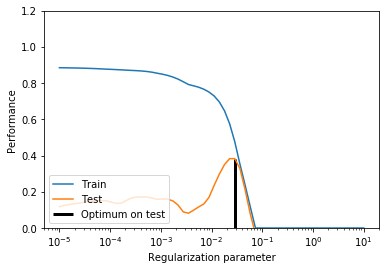

C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Optimal regularization parameter : 0.022695105366946706 for l1 ratio is 0.9


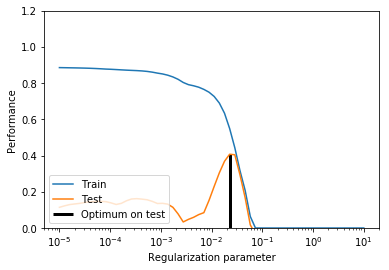

C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Optimal regularization parameter : 0.022695105366946706 for l1 ratio is 0.95


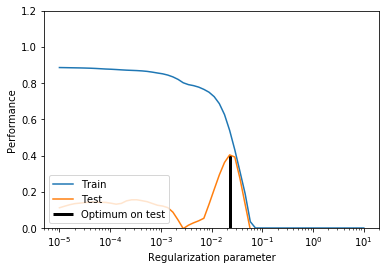

C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

Optimal regularization parameter : 0.022695105366946706 for l1 ratio is 1


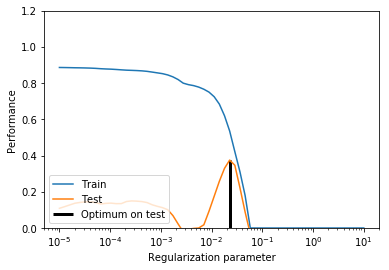

In [21]:
# Feature Selection with Elastic Net, train lambda first
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

listToDrop=['BAA_GS10_Difference','GS10_Difference','BAA_Difference','AAA_Difference']
Response=dfnew2['BAA_GS10_Difference']
NumAll=len(dfnew2.index)
p=0.8

n_samples_train, n_features = int(NumAll*p), len(dfnew2.columns)
n_samples_test=NumAll-n_samples_train

X = dfnew2.drop(listToDrop,axis=1)
y = Response

# Split train and test data
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
 
###############################################################################
# Compute train and test errors

l1_Ratios=[.1, .5, .7,.8, .9, .95, 1] #1 is LASSO
for l1R in l1_Ratios:
    alphas = np.logspace(-5, 1, 60)
    enet = linear_model.ElasticNet(l1_ratio=l1R, fit_intercept=True, normalize=True, precompute=False, max_iter=5000, copy_X=True)
    train_errors = list()
    test_errors = list()
    for alpha in alphas:
        enet.set_params(alpha=alpha)
        enet.fit(X_train, y_train)
        train_errors.append(enet.score(X_train, y_train))
        test_errors.append(enet.score(X_test, y_test))

    i_alpha_optim = np.argmax(test_errors)
    alpha_optim = alphas[i_alpha_optim]
    print("Optimal regularization parameter : %s for l1 ratio is %s" % (alpha_optim,l1R))
    
###############################################################################
# Plot results functions
    plt.semilogx(alphas, train_errors, label='Train')
    plt.semilogx(alphas, test_errors, label='Test')
    plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',linewidth=3, label='Optimum on test')
    plt.legend(loc='lower left')
    plt.ylim([0, 1.2])
    plt.xlabel('Regularization parameter')
    plt.ylabel('Performance')
    plt.show()

In [22]:
optimL1ratio= 0.7
optimAlpha= 0.02868316813342012
enet = linear_model.ElasticNet(l1_ratio=optimL1ratio, fit_intercept=True, normalize=True, precompute=False, max_iter=1000, copy_X=True)
enet.set_params(alpha=optimAlpha)
enetRes=enet.fit(X, y)
coef= pd.Series(enetRes.coef_, index = X.columns)
coefFinal=coef[coef!=0]
coefFinal

IPG2211A2N             0.000806
NCBGCFQ027S_Return    -3.288788
GDPDEF_Return        -10.272626
CPIAUCSL_Return       -2.307912
CPILFENS_Return       -0.812864
RU1000VPR_Return      -0.007635
RU1000TR_Return       -0.115760
RU3000TR_Return       -0.048719
UNRATE_Difference      0.012600
INDPRO_Return         -5.889059
IPMAN_Return          -5.512237
dtype: float64

In [23]:
# Feature Selection with LASSO, we want the features with coef not zero
model_lasso = LassoCV(alphas = [1, 0.1, 0.001,0.022695105366946706, 0.0005]).fit(X, y)
LAScoef = pd.Series(model_lasso.coef_, index = X.columns)
LAScoef=LAScoef[LAScoef!=0]
LAScoef

C:\Users\think\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\think\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase

IPG2211A2N    0.016904
dtype: float64

## OLS

In [3]:
#import data
df = pd.read_csv('C:/Users/think/Downloads/tot_daily_df_interpolate_lag1.csv',index_col=0)
df.head()

,T10Y2Y,DGS10,AAA10Y_1Lead,VIXCLS,GoldReturn,DCOILWTICOReturn,NASDAQ100Return,RU2000PRReturn,RU3000TRReturn,UNRATE,BUSINVReturn,CPIAUCSLReturn
DATE,,,,,,,,,,,,
1/2/90,0.07,7.94,0.91,17.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/3/90,0.05,7.99,0.91,18.19,-0.013410,0.039842,-0.007139,0.004913,0.325863,NaN,NaN,NaN
1/4/90,0.06,7.98,0.89,19.22,-0.003412,-0.016942,-0.006122,-0.003588,0.313952,NaN,NaN,NaN
1/5/90,0.09,7.99,0.88,20.11,0.015701,-0.014630,-0.007056,-0.002676,0.308497,NaN,NaN,NaN
1/8/90,0.12,8.02,0.90,20.26,0.006336,-0.063990,0.001791,-0.000237,0.314709,NaN,NaN,NaN


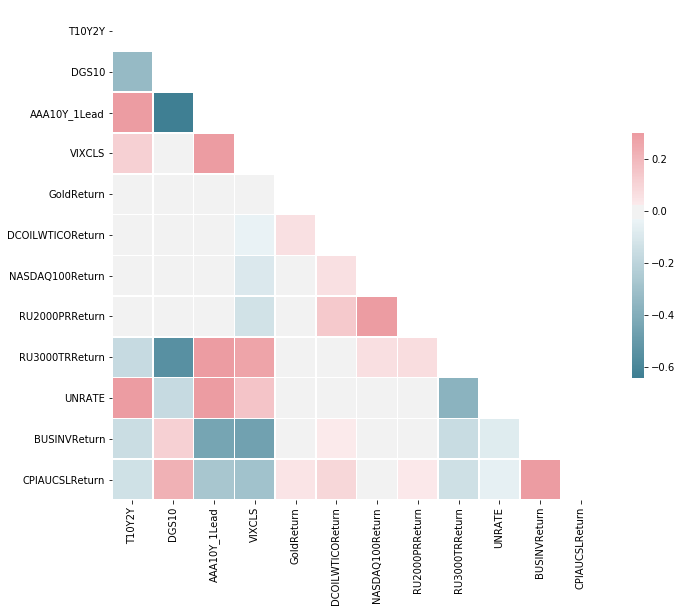

In [4]:
# explore correlation
corr = df.corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Concluding that AAA-10Y has correlation with: 
    10Y - 2Y (positive)
    10Y (negative)
    VIX (Positive)
    RU3000Return (Positive)
    UNRATE(positive)
    BUSINV(Negative)
    CPI(Negative)
    
Problem remains: 1.Interpolate method 2.Causality

In [7]:
#Try regression
model1 = sm.ols(formula = "AAA10Y_1Lead ~ T10Y2Y + DGS10 + VIXCLS + RU3000TRReturn + UNRATE + BUSINVReturn + CPIAUCSLReturn", 
                 data=df, missing='drop').fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AAA10Y_1Lead   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     2946.
Date:                Fri, 17 May 2019   Prob (F-statistic):               0.00
Time:                        21:05:23   Log-Likelihood:                 600.37
No. Observations:                6370   AIC:                            -1185.
Df Residuals:                    6362   BIC:                            -1131.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3184      0.034      9.310      0.000       0.251       0.385
T10Y2Y             0.1914      0.005     37.397      0.000       0.181       0.201
DGS10             -0.0645      0.002    -27.618      0.000      -0.069      -0.060
VIXCLS             0.0167      0.000     35.807      0.000       0.016       0.018
RU3000TRReturn     1.1029      0.031     35.077      0.000       1.041       1.165
UNRATE             0.0359      0.003     11.543      0.000       0.030       0.042
BUSINVReturn     -16.1068      0.698    -23.070      0.000     -17.475     -14.738
CPIAUCSLReturn     5.8008      1.339      4.334      0.000       3.177       8.425
==============================================================================
Omnibus:                       26.881   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.674
Skew:                           0.038   Prob(JB):                     3.24e-05
Kurtosis:                       2.731   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# Leave out unemployment rate, RU3000
model2 = sm.ols(formula = "AAA10Y_1Lead ~ T10Y2Y + DGS10 + VIXCLS  + BUSINVReturn + CPIAUCSLReturn", 
                 data=df, missing='drop').fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AAA10Y_1Lead   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     3232.
Date:                Fri, 17 May 2019   Prob (F-statistic):               0.00
Time:                        21:05:30   Log-Likelihood:                 24.003
No. Observations:                6370   AIC:                            -36.01
Df Residuals:                    6364   BIC:                             4.550
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.3172      0.014     91.291      0.000       1.289       1.345
T10Y2Y             0.1607      0.004     44.162      0.000       0.154       0.168
DGS10             -0.1186      0.002    -61.647      0.000      -0.122      -0.115
VIXCLS             0.0244      0.000     55.435      0.000       0.024       0.025
BUSINVReturn     -15.8759      0.759    -20.914      0.000     -17.364     -14.388
CPIAUCSLReturn    12.2275      1.448      8.447      0.000       9.390      15.065
==============================================================================
Omnibus:                      167.153   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.385
Skew:                           0.377   Prob(JB):                     5.55e-41
Kurtosis:                       3.360   Cond. No.                     1.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#Selected mdel
model3 = sm.ols(formula = "AAA10Y_1Lead ~ T10Y2Y  + DGS10 +VIXCLS", 
                 data=df, missing='drop').fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AAA10Y_1Lead   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     5917.
Date:                Fri, 17 May 2019   Prob (F-statistic):               0.00
Time:                        21:05:34   Log-Likelihood:                -102.35
No. Observations:                6861   AIC:                             212.7
Df Residuals:                    6857   BIC:                             240.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2916      0.012    104.834      0.000       1.267       1.316
T10Y2Y         0.1616      0.004     44.761      0.000       0.155       0.169
DGS10         -0.1295      0.002    -78.516      0.000      -0.133      -0.126
VIXCLS         0.0266      0.000     69.019      0.000       0.026       0.027
==============================================================================
Omnibus:                      382.905   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              511.817
Skew:                           0.525   Prob(JB):                    7.25e-112
Kurtosis:                       3.829   Cond. No.                         89.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#validation

X = df[['T10Y2Y','DGS10','VIXCLS']]
X = sts.add_constant(X)
model3.predict(X)

DATE
1/2/90      0.733681
1/3/90      0.749252
1/4/90      0.779568
1/5/90      0.806800
1/8/90      0.811755
1/9/90      0.861756
1/10/90     0.868462
1/11/90     0.805194
1/12/90     0.926014
1/15/90          NaN
1/16/90     0.889517
1/17/90     0.890280
1/18/90     0.873391
1/19/90     0.830587
1/22/90     0.945887
1/23/90     0.892885
1/24/90     0.911335
1/25/90     0.912542
1/26/90     0.925622
1/29/90     0.926968
1/30/90     0.948841
1/31/90     0.899216
2/1/90      0.885858
2/2/90      0.859251
2/5/90      0.866068
2/6/90      0.863265
2/7/90      0.851016
2/8/90      0.844296
2/9/90      0.855776
2/12/90     0.865714
              ...   
12/25/18         NaN
12/26/18    1.769235
12/27/18    1.764057
12/28/18    1.725812
12/31/18    1.653621
1/1/19           NaN
1/2/19      1.590891
1/3/19      1.664785
1/4/19      1.542256
1/7/19      1.538905
1/8/19      1.507045
1/9/19      1.497561
1/10/19     1.484790
1/11/19     1.450587
1/14/19     1.477233
1/15/19     1.465049
1/16/19 

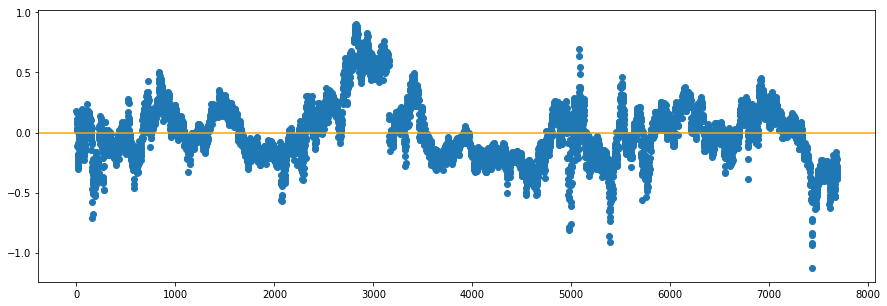

In [11]:
error = list(df['AAA10Y_1Lead']-model3.predict(X))
plt.figure(figsize=(15,5))
plt.scatter(np.arange(len(error)),error)
plt.axhline(y=0,color="orange")
plt.show()


C:\Users\think\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\think\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\think\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


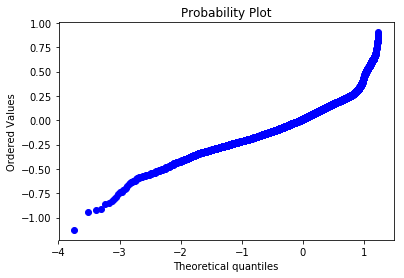

In [12]:
stats.probplot(error, dist="norm", plot=plt)
plt.plot()
plt.show()

## Decision Tree

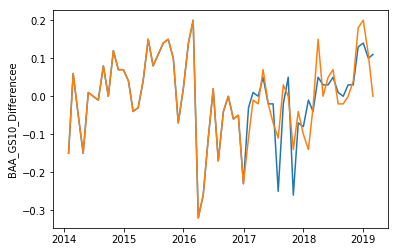

In [20]:
df = pd.read_csv('C:/Users/think/Downloads/monthly_stationary.csv')
df['DATE'] = df['DATE'].apply(parser.parse)

data_train = df[df['DATE'] < datetime(2017, 1, 1)]
date_test = df[df['DATE'] >= datetime(2017, 1, 1)]

X_train = data_train.drop(['DATE', 'BAA_GS10_Difference'], axis=1)
Y_train = data_train['BAA_GS10_Difference']

tree = DecisionTreeRegressor().fit(X_train, Y_train)

X_all = df.drop(['DATE', 'BAA_GS10_Difference'], axis=1)

predict_tree = tree.predict(X_all)

plt.ylabel('BAA_GS10_Differencee')
# plt.plot(df['DATE'], predict_tree[len(df) -
# plt.plot(df['DATE'], df['BAA_GS10_Difference'])

plt.plot(df[df['DATE'] > datetime(2014, 1, 1)]['DATE'], predict_tree[len(df) - 62:])
plt.plot(df[df['DATE'] > datetime(2014, 1, 1)]['DATE'], df[df['DATE'] > datetime(2014, 1, 1)]['BAA_GS10_Difference'])

plt.show()

# df['DATE'] = df['DATE'].apply(parser.parse)
# df.set_index(['DATE'], inplace=True)


## Models Comparison

In [21]:
def plot_feature_importance(model):
    n_features = X_all.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_all.columns)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')

In [22]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

C:\Users\think\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


DecisionTree_train_set_score:  5.152037915804742e-32  DecisionTree_test_set_score:  0.010428571428571403
RandomForest_train_set_score:  0.004553198198198191  RandomForest_test_set_score:  0.008686357142857148
Boosting_train_set_score:  0.002535816652256648  Boosting_test_set_score:  0.011157642781811616


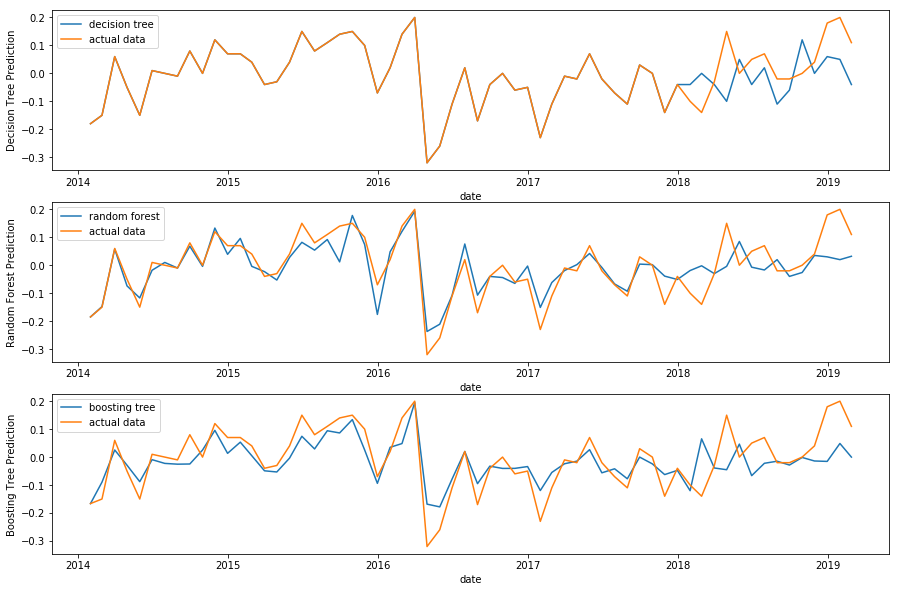

In [30]:
df = pd.read_csv('C:/Users/think/Downloads/monthly_stationary.csv')
df.drop(['BAA_Difference'], axis=1, inplace=True)
# df = df[['DATE', 'VIXCLS_Difference', 'GS10_Difference', 'T10Y2YM_Difference', 'GS10_BAA_Difference']]
df['DATE'] = df['DATE'].apply(parser.parse)

start_predict_date = datetime(2018, 1, 1)

data_train = df[df['DATE'] < start_predict_date]
date_test = df[df['DATE'] >= start_predict_date]

X_train = data_train.drop(['DATE', 'BAA_GS10_Difference'], axis=1)
lag = 1
Y_train = data_train['BAA_GS10_Difference'].shift(lag)
X_train.drop(list(range(lag)), inplace=True)
Y_train.drop(list(range(lag)), inplace=True)

tree = DecisionTreeRegressor().fit(X_train, Y_train)
forest = RandomForestRegressor().fit(X_train, Y_train)
boosting = GradientBoostingRegressor().fit(X_train, Y_train)

X_all = df.drop(['DATE', 'BAA_GS10_Difference'], axis=1)
X_all.drop(list(range(lag)), inplace=True)
df.drop(list(range(lag)), inplace=True)
Y_test = date_test['BAA_GS10_Difference']

predict_tree = tree.predict(X_all)
predict_forest = forest.predict(X_all)
predict_boosting = boosting.predict(X_all)

train_score = squared_error(Y_train, predict_tree[:len(Y_train)]) / len(Y_train)
test_score = squared_error(Y_test, predict_tree[len(Y_train):]) / len(Y_test)
print('DecisionTree_train_set_score: ', train_score, ' DecisionTree_test_set_score: ', test_score)
train_score = squared_error(Y_train, predict_forest[:len(Y_train)]) / len(Y_train)
test_score = squared_error(Y_test, predict_forest[len(Y_train):]) / len(Y_test)
print('RandomForest_train_set_score: ', train_score, ' RandomForest_test_set_score: ', test_score)
train_score = squared_error(Y_train, predict_boosting[:len(Y_train)]) / len(Y_train)
test_score = squared_error(Y_test, predict_boosting[len(Y_train):]) / len(Y_test)
print('Boosting_train_set_score: ', train_score, ' Boosting_test_set_score: ', test_score)


plt.figure(figsize=(15,10))
# plt.subplot(3, 1, 1)
# plot_feature_importance(tree)
# plt.subplot(3, 1, 2)
# plot_feature_importance(forest)
# plt.subplot(3, 1, 3)
# plot_feature_importance(boosting)
# plt.show()

# plt.plot(df[df['DATE'] > datetime(2014, 1, 1)]['DATE'], predict_tree[len(df) - 62:], label='decision tree')
# plt.plot(df[df['DATE'] > datetime(2014, 1, 1)]['DATE'], predict_forest[len(df) - 62:], label='random forest')
# plt.plot(df[df['DATE'] > datetime(2014, 1, 1)]['DATE'], predict_boosting[len(df) - 62:], label='boosting tree')
# plt.plot(df[df['DATE'] > datetime(2014, 1, 1)]['DATE'], df[df['DATE'] > datetime(2014, 1, 1)]['GS10_BAA_Difference'],
#          label='actual data')
# plt.subplot(1, 2, 1)
# plt.plot(df['DATE'], predict_forest, label='random forest')
# plt.plot(df['DATE'], predict_boosting, label='boosting tree')
# plt.plot(df['DATE'], df['BAA_GS10_Difference'], label='actual data')
# plt.subplot(1, 2, 2)
# plt.plot(df[df['DATE'] > datetime(2014, 1, 1)]['DATE'], predict_tree[len(df) - 62:], label='decision tree')
# plt.plot(df[df['DATE'] > datetime(2014, 1, 1)]['DATE'], predict_forest[len(df) - 62:], label='random forest')
# plt.plot(df[df['DATE'] > datetime(2014, 1, 1)]['DATE'], predict_boosting[len(df) - 62:], label='boosting tree')
# plt.plot(df[df['DATE'] > datetime(2014, 1, 1)]['DATE'],
#          [0] + list(df[df['DATE'] > datetime(2014, 1, 1)]['BAA_GS10_Difference'])[:-1],
#          label='actual data')

plt.subplot(3, 1, 1)
plt.plot(df[df['DATE'] > datetime(2014, 1, 1)]['DATE'], predict_tree[len(df) - 62:], label='decision tree')
plt.plot(df[df['DATE'] > datetime(2014, 1, 1)]['DATE'],
         [predict_tree[len(df) - 62]] + list(df[df['DATE'] > datetime(2014, 1, 1)]['BAA_GS10_Difference'])[:-1],
         label='actual data')
plt.xlabel('date')
plt.ylabel('Decision Tree Prediction')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df[df['DATE'] > datetime(2014, 1, 1)]['DATE'], predict_forest[len(df) - 62:], label='random forest')
plt.plot(df[df['DATE'] > datetime(2014, 1, 1)]['DATE'],
         [predict_forest[len(df) - 62]] + list(df[df['DATE'] > datetime(2014, 1, 1)]['BAA_GS10_Difference'])[:-1],
         label='actual data')
plt.xlabel('date')
plt.ylabel('Random Forest Prediction')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df[df['DATE'] > datetime(2014, 1, 1)]['DATE'], predict_boosting[len(df) - 62:], label='boosting tree')
plt.plot(df[df['DATE'] > datetime(2014, 1, 1)]['DATE'],
         [predict_boosting[len(df) - 62]] + list(df[df['DATE'] > datetime(2014, 1, 1)]['BAA_GS10_Difference'])[:-1],
         label='actual data')
plt.xlabel('date')
plt.ylabel('Boosting Tree Prediction')
plt.legend()

plt.show()

temp = 'End'
